<a href="https://colab.research.google.com/github/MartinaWestrik/Classification-Water-Quality/blob/main/MSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fpdf
from fpdf import FPDF

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=5b04510f907dc3fe220de7ed4d70f83894b5384b11fa185ab8273ef3b81b48a8
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [3]:
# Simulate sample metadata
np.random.seed(42)

num_users = 20
num_events = 500
features = ['Dashboard', 'Goals', 'Education', 'Reminders', 'Blood Glucose']
user_ids = [f"user_{i+1}" for i in range(num_users)]

data = {
    'user_id': np.random.choice(user_ids, size=num_events),
    'timestamp': [datetime(2025, 5, 1) + timedelta(minutes=np.random.randint(0, 43200)) for _ in range(num_events)],
    'feature': np.random.choice(features, size=num_events),
    'duration_sec': np.random.exponential(scale=300, size=num_events).astype(int)
}
df = pd.DataFrame(data)
df['duration_min'] = df['duration_sec'] / 60

In [4]:
# Aggregate per user
user_engagement = df.groupby('user_id').agg(
    total_sessions=('timestamp', 'count'),
    avg_session_duration=('duration_min', 'mean'),
    total_time_spent=('duration_min', 'sum')
).reset_index()

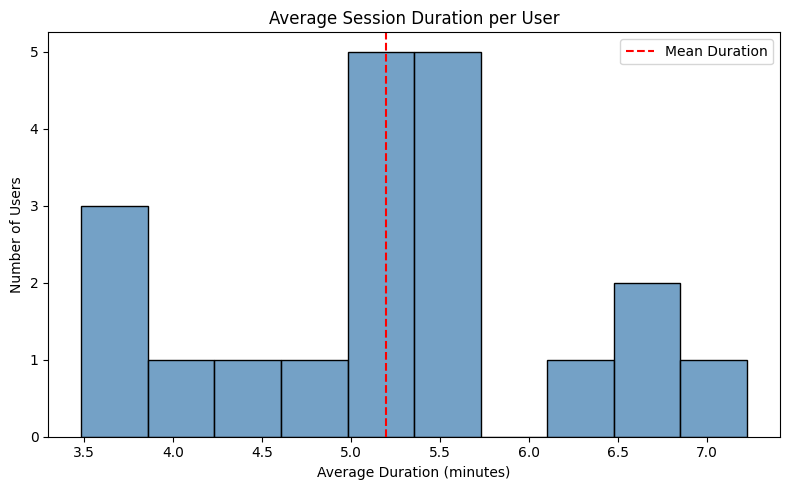

In [5]:
# Plot: Histogram of average session durations
plt.figure(figsize=(8, 5))
sns.histplot(user_engagement['avg_session_duration'], bins=10, color='steelblue', edgecolor='black')
plt.axvline(user_engagement['avg_session_duration'].mean(), color='red', linestyle='--', label='Mean Duration')
plt.title("Average Session Duration per User")
plt.xlabel("Average Duration (minutes)")
plt.ylabel("Number of Users")
plt.legend()
plt.tight_layout()

In [6]:
# Save outputs
plot_path = "user_engagement_histogram.png"
csv_path = "user_engagement_summary.csv"
plt.savefig(plot_path)
user_engagement.to_csv(csv_path, index=False)

plot_path, csv_path


('user_engagement_histogram.png', 'user_engagement_summary.csv')

<Figure size 640x480 with 0 Axes>

In [7]:
# Create PDF for the analytical sample
class PDFReport(FPDF):
    def header(self):
        self.set_font("Arial", 'B', 14)
        self.cell(0, 10, "Sample Analysis: User Engagement from App Metadata", ln=True, align='C')
        self.ln(5)

    def section_title(self, title):
        self.set_font("Arial", 'B', 12)
        self.cell(0, 10, title, ln=True)
        self.ln(2)

    def section_body(self, text):
        self.set_font("Arial", '', 11)
        self.multi_cell(0, 6, text)
        self.ln()

In [8]:
# Initialize PDF
pdf = PDFReport()
pdf.add_page()

# Add content
pdf.section_title("Overview")
pdf.section_body(
    "This short analysis demonstrates how user engagement can be measured using mobile app metadata. "
    "Simulated data includes user IDs, timestamps, feature usage, and session durations in seconds. "
    "From this, we calculate total sessions, average session durations, and total time spent per user."
)

pdf.section_title("Key Metrics Computed")
pdf.section_body(
    "- Total number of sessions per user\n"
    "- Average session duration (in minutes)\n"
    "- Total time spent using the app per user"
)

pdf.section_title("Visualization")
pdf.section_body(
    "The histogram below shows the distribution of average session durations across users. "
    "This allows us to quickly identify typical engagement levels and detect outliers."
)

# Add image
pdf.image("user_engagement_histogram.png", w=170)

# Save the PDF
pdf_path = "User_Engagement_Analysis_Martina_Westrik.pdf"
pdf.output(pdf_path)

pdf_path


'User_Engagement_Analysis_Martina_Westrik.pdf'